<a href="https://colab.research.google.com/github/arnaldomariano/Facial_Emotion_Detection/blob/main/Facial_Emotion_Detection'_BaseNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**.

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **GPU Info**

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Mar 20 07:55:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **Importing the Libraries**

In [4]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf


### **Let us load the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [5]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

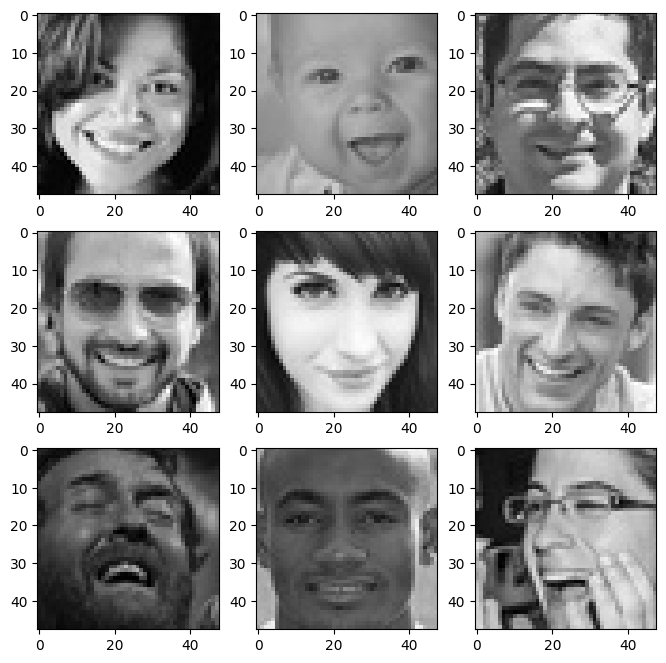

In [7]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:** Expressions of happiness can be observed through the sparkle in the eyes, a wide smile, and a light and relaxed facial expression. Laughter, animated movements, and an open facial expression are also indicative of joy. A happy person often exhibits a relaxed body posture, shows curiosity in their surroundings, and engages in positive verbal expressions. Physical manifestations, such as affectionate gestures and a radiant skin complexion, accompany the overall sense of contentment.


### **Sad**

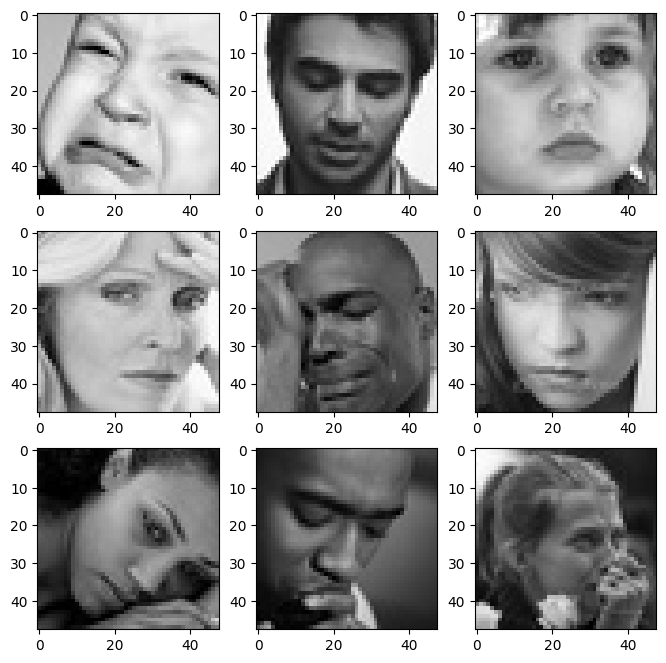

In [8]:
# Write your code to visualize images from the class 'sad'.
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()


**Observations and Insights:**
Expressions of sadness are characterized by a subdued demeanor, evident in a downturned gaze, a muted smile, and a heavy facial expression. A person experiencing sadness may display a slouched or tense body posture, limited facial animation, and subdued movements. Signs include sighs, diminished interest in surroundings, and withdrawal from social engagement. Verbal expressions may involve a quieter tone, slower speech, and the use of somber language. Physical manifestations such as tearfulness, a pale complexion, and a lack of energy contribute to the overall appearance of melancholy, providing insight into the complex nature of sadness.

### **Neutral**

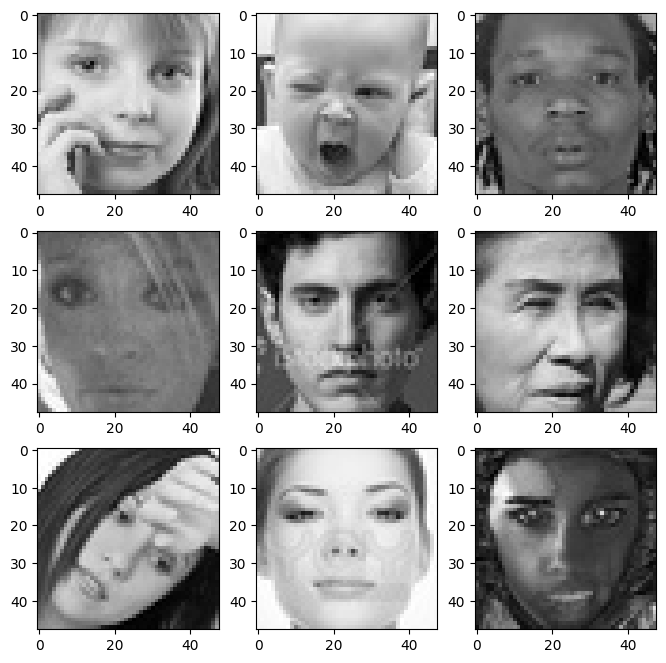

In [9]:
# Write your code to visualize images from the class 'neutral'.
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:** Facial expressions of neutrality are characterized by a calm and composed demeanor, typically featuring a neutral gaze, a relaxed facial expression, and a lack of pronounced emotional intensity. The individual may exhibit a balanced body posture with minimal facial animation and movements. Verbal expressions tend to have a moderate tone and pace, with language devoid of strong emotional markers. In terms of physical manifestations, there is an absence of notable signs such as excessive smiling, frowning, or other overt emotional displays. Observing these cues provides an understanding of the person's neutral emotional state, marked by a lack of distinct positive or negative affect.

### **Surprised**

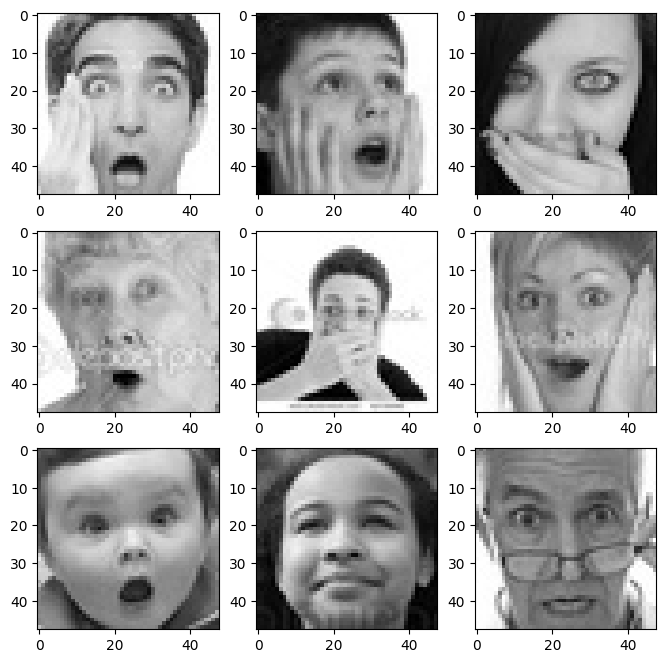

In [10]:
# Write your code to visualize images from the class 'surprise'.
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:** Expressions of surprise are typically characterized by a sudden and heightened emotional response. Common features include widened eyes, raised eyebrows, and an open mouth, reflecting a momentary state of astonishment. The individual may exhibit a slightly tilted or backward head position, emphasizing the element of being taken aback. Physical manifestations often include a rapid inhalation, creating a momentarily frozen or paused posture. Verbal expressions may involve gasps, short exclamations, or an increased pitch in tone. The overall appearance is marked by an immediate shift from the expected, providing a clear visual and audible indication of the emotional response to unexpected stimuli.

## **Checking Distribution of Classes**

In [11]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'Happy':   ", num_happy)

# Write the code to get the number of training images from the class 'sad'.
num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'Sad':   ", num_sad)

# Write the code to get the number of training images from the class 'neutral'.
num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'Neutral':   ", num_happy)

# Write the code to get the number of training images from the class 'surprise'.
num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'Surprised':   ", num_surprise)

Number of images in the class 'Happy':    3976
Number of images in the class 'Sad':    3982
Number of images in the class 'Neutral':    3976
Number of images in the class 'Surprised':    3173


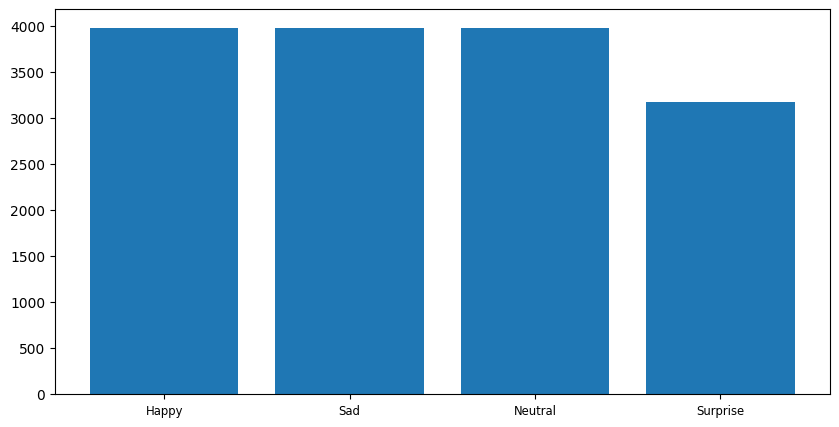

In [12]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:** "The number of images is similar for most categories, with the exception of surprise expressions, which has around 23% fewer images than the others."

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [13]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

# Provide your chosen color_mode here ,
train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode =  "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

# Write your code here
datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

# Provide your chosen color_mode here,
validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode =  "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

# Write your code here
datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode =  "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)# Write your code here

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [14]:
# Initializing a Sequential Model
# Write your code to compile your model1. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.
# Compile the model

def cnn_model():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    # First convolution layer
    model.add(Conv2D(filters=64, kernel_size=(2,2), padding="same", input_shape=(48, 48, 3)))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size= (2, 2)))

    model.add(Dropout(0.2))


    # Second convolution layer
    model.add(Conv2D(filters=32, kernel_size=(2,2), padding="same"))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size= (2, 2)))

    model.add(Dropout(0.2))


    # Third convolution layer
    model.add(Conv2D(filters=32, kernel_size=(2,2), padding="same"))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size= (2, 2)))

    model.add(Dropout(0.2))


    #Add a BatchNormalization layer

    model.add(Dense(512, activation = 'relu'))

    model.add(Flatten())

    model.add(Dropout(0.4))

    model.add(Dense(4, activation = 'softmax'))

    # Compile the model

    model.compile(
      loss= 'categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      metrics=['accuracy']
    )

    return model


In [15]:
# Build the model
model_1 = cnn_model


In [16]:
#Create an instance
model_1 = cnn_model()


In [17]:
# Print the summary
model_1.summary()

model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                        

### **Training the Model**

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [19]:
# Write your code to fit your model1. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

history_cnn_model = model_1.fit(
    train_set,
    validation_data = validation_set,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    verbose=1
)

Epoch 1/20
473/473 [==============================] - 41s 66ms/step - loss: 1.3727 - accuracy: 0.2910 - val_loss: 1.3374 - val_accuracy: 0.3253
Epoch 2/20
473/473 [==============================] - 28s 60ms/step - loss: 1.2236 - accuracy: 0.4493 - val_loss: 1.1300 - val_accuracy: 0.5057
Epoch 3/20
473/473 [==============================] - 30s 64ms/step - loss: 1.1247 - accuracy: 0.5085 - val_loss: 1.1006 - val_accuracy: 0.5208
Epoch 4/20
473/473 [==============================] - 29s 60ms/step - loss: 1.0681 - accuracy: 0.5403 - val_loss: 0.9710 - val_accuracy: 0.5921
Epoch 5/20
473/473 [==============================] - 28s 59ms/step - loss: 1.0342 - accuracy: 0.5519 - val_loss: 0.9827 - val_accuracy: 0.5873
Epoch 6/20
473/473 [==============================] - 28s 59ms/step - loss: 1.0113 - accuracy: 0.5646 - val_loss: 0.9520 - val_accuracy: 0.6000
Epoch 7/20
473/473 [==============================] - 28s 60ms/step - loss: 0.9895 - accuracy: 0.5773 - val_loss: 1.0441 - val_accuracy:

### **Evaluating the Model on the Test Set**

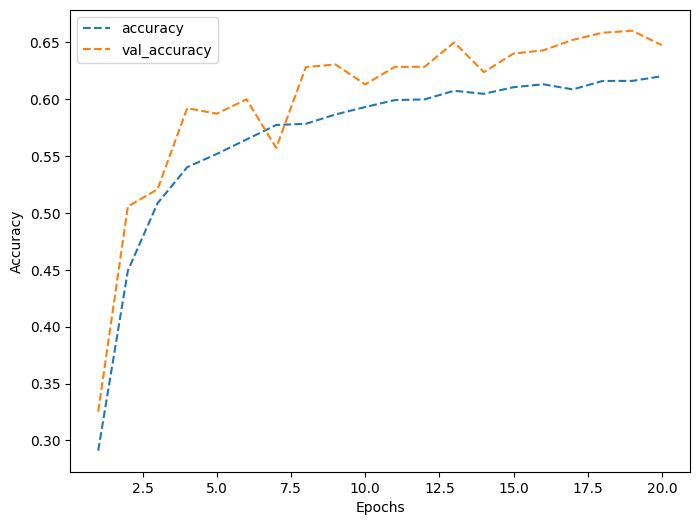

In [20]:
# Write your code to evaluate your model on test data.
# Plotting the accuracies

dict_hist = history_cnn_model.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 6))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

4/4 [==============================] - 0s 41ms/step


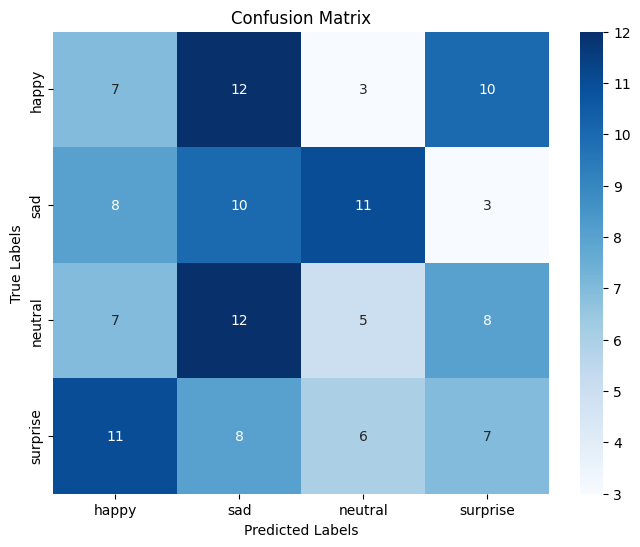

Classification Report:
              precision    recall  f1-score   support

       happy       0.21      0.22      0.22        32
         sad       0.24      0.31      0.27        32
     neutral       0.20      0.16      0.18        32
    surprise       0.25      0.22      0.23        32

    accuracy                           0.23       128
   macro avg       0.23      0.23      0.22       128
weighted avg       0.23      0.23      0.22       128



In [21]:
# Plot the confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model_1.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_set.classes

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt='g', cmap='Blues', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate and print the classification report
class_labels = ['happy', 'sad', 'neutral', 'surprise']
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(classification_rep)


**Observations and Insights:__**

### **Creating the second Convolutional Neural Network**

In the second Neural network, we will add a few more Convolutional blocks. We will also use Batch Normalization layers.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.
* Add first Conv2D layer with **256 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **32 filters**.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add the second Dense Layer with **128 neurons** and use **'relu' activation** function.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [22]:
# Initializing a Sequential Model
# Write your code to compile your model_2. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.
# Compile the model

# Initializing a Sequential Model
# Write your code to compile your model_2. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.
# Compile the model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU

def cnn_model_2():
    model = Sequential()

    # First convolution layer
    model.add(Conv2D(filters=256, kernel_size=(2, 2), padding="same", input_shape=(48, 48, 3)))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Second convolution layer
    model.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Third convolution layer
    model.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Third convolution layer
    model.add(Conv2D(filters=32, kernel_size=(2, 2), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Flatten before transitioning to fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation='softmax'))

    return model


In [23]:
# Build the model
model_2 = cnn_model_2

In [24]:
#Create an instance
model_2 = cnn_model_2()

In [25]:
# Print the summary
model_2.summary()

model: "sequential"

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       3328      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 256)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 256)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 24, 24, 128)       0         
                                                      

### **Compiling and Training the Model**

**Hint:** Take reference from the code we used in the previous model for Compiling and Training the Model.

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')

# Write your code here. You may play around with the hyperparameters if you wish.
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
)

# Write your code here. You may play around with the hyperparameters if you wish.
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)


callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [27]:
# Write your code to compile your model2. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics as 'accuracy'.
  # Compile the model

model_2.compile(
      loss= 'categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      metrics=['accuracy']
)


In [28]:
# Write your code to fit your model2. Use train_set as the training data and validation_set as the validation data. Train your model for 20 epochs.
history_cnn_model_2 = model_2.fit(
    train_set,
    validation_data = validation_set,
    batch_size=128,
    epochs=20,
    verbose=1
)

Epoch 1/20
473/473 [==============================] - 35s 67ms/step - loss: 1.3827 - accuracy: 0.2683 - val_loss: 1.3623 - val_accuracy: 0.3255
Epoch 2/20
473/473 [==============================] - 31s 67ms/step - loss: 1.3529 - accuracy: 0.3090 - val_loss: 1.3340 - val_accuracy: 0.3150
Epoch 3/20
473/473 [==============================] - 30s 64ms/step - loss: 1.2669 - accuracy: 0.3835 - val_loss: 1.1948 - val_accuracy: 0.4515
Epoch 4/20
473/473 [==============================] - 30s 64ms/step - loss: 1.2224 - accuracy: 0.4319 - val_loss: 1.1315 - val_accuracy: 0.4931
Epoch 5/20
473/473 [==============================] - 31s 67ms/step - loss: 1.1671 - accuracy: 0.4731 - val_loss: 1.0689 - val_accuracy: 0.5296
Epoch 6/20
473/473 [==============================] - 31s 66ms/step - loss: 1.1186 - accuracy: 0.5092 - val_loss: 1.0310 - val_accuracy: 0.5465
Epoch 7/20
473/473 [==============================] - 30s 64ms/step - loss: 1.0879 - accuracy: 0.5178 - val_loss: 1.0132 - val_accuracy:

## **Evaluating the Model on the Test Set**

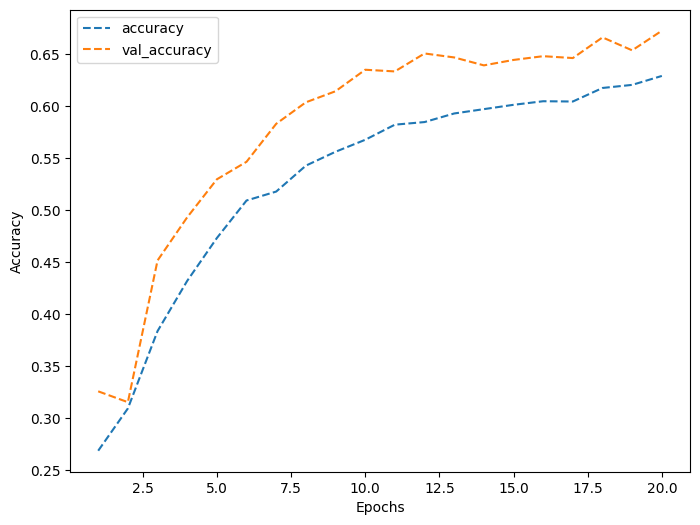

In [29]:
# Write your code to evaluate model's test performance
# Write your code to evaluate your model on test data.
# Plotting the accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 6))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations and Insights:__**

4/4 [==============================] - 1s 73ms/step


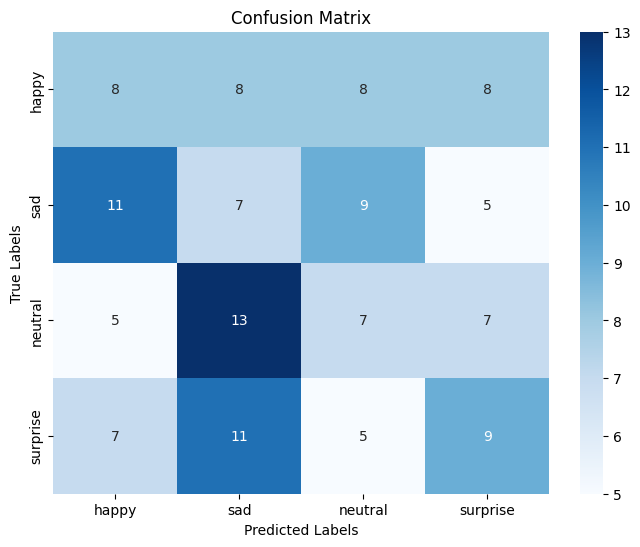

Classification Report:
              precision    recall  f1-score   support

       happy       0.26      0.25      0.25        32
         sad       0.18      0.22      0.20        32
     neutral       0.24      0.22      0.23        32
    surprise       0.31      0.28      0.30        32

    accuracy                           0.24       128
   macro avg       0.25      0.24      0.24       128
weighted avg       0.25      0.24      0.24       128



In [30]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model_2.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_set.classes

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt='g', cmap='Blues', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate and print the classification report
class_labels = ['happy', 'sad', 'neutral', 'surprise']
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(classification_rep)


#**Creating the third Convolutional Neural Network with grayscale**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary\

In [31]:
# Initializing a Sequential Model
# Write your code to compile your model_2. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.
# Compile the model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU

def cnn_model_g1():
    model = Sequential()

    # First convolution layer
    model.add(Conv2D(filters=256, kernel_size=(2, 2), padding="same", input_shape=(48, 48, 1)))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Second convolution layer
    model.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Third convolution layer
    model.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Third convolution layer
    model.add(Conv2D(filters=32, kernel_size=(2, 2), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Flatten before transitioning to fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation='softmax'))

    return model


In [32]:
# Build the model
model_g1 = cnn_model

In [33]:
#Create an instance
model_g1 = cnn_model()


In [34]:
# Print the summary
model_g1.summary()

model: "sequential"

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        832       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                      

# **Compiling and training the model**

In [35]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]


In [36]:
# Write your code to fit your model1. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

history_model_g1 = model_g1.fit(
    train_set,
    validation_data = validation_set,
    batch_size=128,
    epochs=20,
    verbose=1
)

Epoch 1/20
473/473 [==============================] - 33s 65ms/step - loss: 1.3360 - accuracy: 0.3382 - val_loss: 1.2156 - val_accuracy: 0.4465
Epoch 2/20
473/473 [==============================] - 32s 68ms/step - loss: 1.1846 - accuracy: 0.4734 - val_loss: 1.1116 - val_accuracy: 0.5270
Epoch 3/20
473/473 [==============================] - 28s 60ms/step - loss: 1.1131 - accuracy: 0.5196 - val_loss: 1.0474 - val_accuracy: 0.5535
Epoch 4/20
473/473 [==============================] - 28s 59ms/step - loss: 1.0688 - accuracy: 0.5395 - val_loss: 0.9919 - val_accuracy: 0.5903
Epoch 5/20
473/473 [==============================] - 28s 59ms/step - loss: 1.0401 - accuracy: 0.5532 - val_loss: 0.9747 - val_accuracy: 0.5891
Epoch 6/20
473/473 [==============================] - 33s 70ms/step - loss: 1.0156 - accuracy: 0.5624 - val_loss: 0.9304 - val_accuracy: 0.6070
Epoch 7/20
473/473 [==============================] - 28s 59ms/step - loss: 0.9917 - accuracy: 0.5763 - val_loss: 0.9341 - val_accuracy:

### **Evaluating the Model on the Test Set**

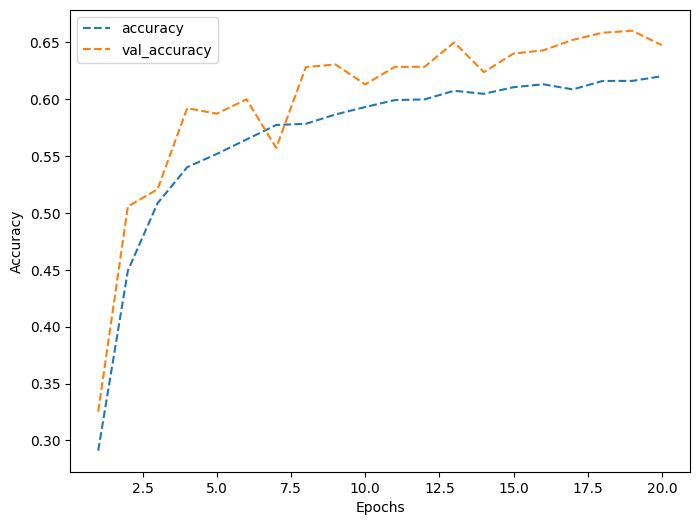

In [37]:
# Write your code to evaluate model's test performance
# Plotting the accuracies

dict_hist = history_cnn_model.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 6))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

4/4 [==============================] - 0s 40ms/step


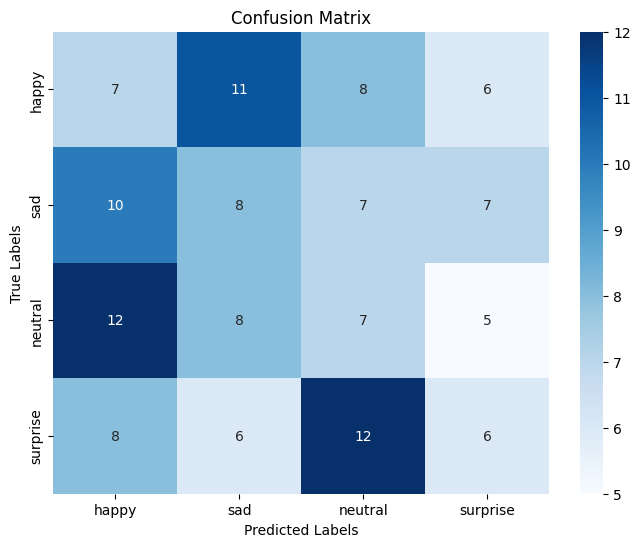

Classification Report:
              precision    recall  f1-score   support

       happy       0.19      0.22      0.20        32
         sad       0.24      0.25      0.25        32
     neutral       0.21      0.22      0.21        32
    surprise       0.25      0.19      0.21        32

    accuracy                           0.22       128
   macro avg       0.22      0.22      0.22       128
weighted avg       0.22      0.22      0.22       128



In [38]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model_g1.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_set.classes

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt='g', cmap='Blues', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate and print the classification report
class_labels = ['happy', 'sad', 'neutral', 'surprise']
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(classification_rep)


## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

[texto do link](https://)## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [40]:
# Data Loaders
batch_size = 32
img_size = 48

datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=True
)

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=False
)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

In [41]:
# VGG16 Model
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

* In this model, we will import till the **'block5_pool'** layer of the VGG16 model. You can scroll down in the model summary and look for 'block5_pool'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

## **Compiling and Training the VGG16 Model**

In [42]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

x = Flatten()(transfer_layer.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred)

# Compiling the Model
vggmodel.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
epochs = 20
history = vggmodel.fit(
    train_set,
    epochs=epochs,
    validation_data=validation_set,
    callbacks=callbacks_list
)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3165 - accuracy: 0.3846

473/473 [==============================] - 33s 61ms/step - loss: 1.3165 - accuracy: 0.3846 - val_loss: 1.1839 - val_accuracy: 0.4659 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.2197 - accuracy: 0.4362

473/473 [==============================] - 26s 55ms/step - loss: 1.2197 - accuracy: 0.4362 - val_loss: 1.1555 - val_accuracy: 0.4957 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1882 - accuracy: 0.4603

473/473 [==============================] - 25s 53ms/step - loss: 1.1882 - accuracy: 0.4603 - val_loss: 1.1381 - val_accuracy: 0.5025 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.1683 - accuracy: 0.4714

473/473 [==============================] - 28s 59ms/step - loss: 1.1683 - accuracy: 0.4714 - val_loss: 1.0801 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 5/20
472/473 [============================>.] - ETA: 0s - loss: 1.1598 - accuracy: 0.4760

473/473 [==============================] - 26s 54ms/step - loss: 1.1600 - accuracy: 0.4759 - val_loss: 1.1125 - val_accuracy: 0.5130 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.1504 - accuracy: 0.4861

473/473 [==============================] - 26s 54ms/step - loss: 1.1504 - accuracy: 0.4861 - val_loss: 1.0592 - val_accuracy: 0.5437 - lr: 0.0010
Epoch 7/20
472/473 [============================>.] - ETA: 0s - loss: 1.1393 - accuracy: 0.4891

473/473 [==============================] - 26s 55ms/step - loss: 1.1394 - accuracy: 0.4892 - val_loss: 1.0826 - val_accuracy: 0.5304 - lr: 0.0010
Epoch 8/20
472/473 [============================>.] - ETA: 0s - loss: 1.1282 - accuracy: 0.5007

473/473 [==============================] - 26s 54ms/step - loss: 1.1284 - accuracy: 0.5004 - val_loss: 1.1430 - val_accuracy: 0.4919 - lr: 0.0010
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 1.1183 - accuracy: 0.5027Restoring model weights from the end of the best epoch: 6.



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 25s 53ms/step - loss: 1.1183 - accuracy: 0.5027 - val_loss: 1.1383 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 9: early stopping


### **Evaluating the VGG16 model**

In [43]:
# Write your code to evaluate model performance on the test set
# Evaluating the Model
eval_result = vggmodel.evaluate(test_set)
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

4/4 [==============================] - 0s 19ms/step - loss: 1.0853 - accuracy: 0.5000
Test Loss: 1.0853180885314941
Test Accuracy: 0.5


4/4 [==============================] - 0s 25ms/step


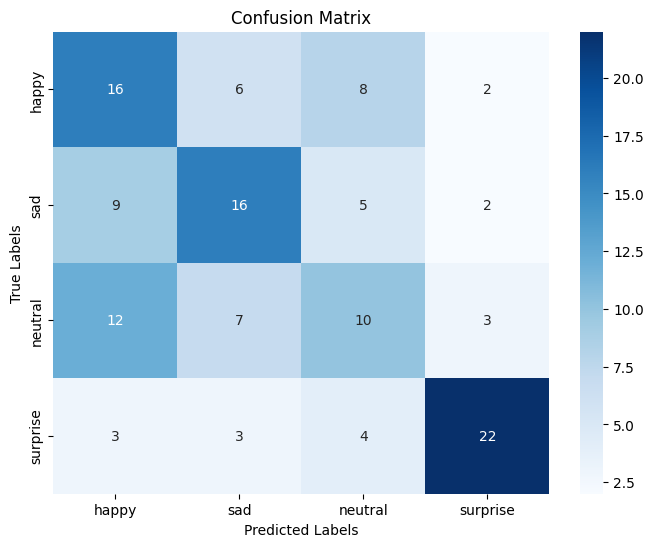

Classification Report:
              precision    recall  f1-score   support

       happy       0.40      0.50      0.44        32
         sad       0.50      0.50      0.50        32
     neutral       0.37      0.31      0.34        32
    surprise       0.76      0.69      0.72        32

    accuracy                           0.50       128
   macro avg       0.51      0.50      0.50       128
weighted avg       0.51      0.50      0.50       128



In [44]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = vggmodel.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_set.classes

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt='g', cmap='Blues', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate and print the classification report
class_labels = ['happy', 'sad', 'neutral', 'surprise']
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(classification_rep)


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

*texto em itálico*## **ResNet V2 Model**

In [45]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# ResNet V2 Model
Resnet = ResNet101(include_top=False, weights="imagenet", input_shape=(48, 48, 3))


171446536/171446536 [==============================] - 1s 0us/step


### **Model Building**

* In this model, we will import till the **'conv5_block3_add'** layer of the ResNet model. You can scroll down in the model summary and look for 'conv5_block3_add'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'conv5_block3_add' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [46]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Load pre-trained ResNet model
Resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Choose the layer from ResNet for feature extraction
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable = False

# Flatten the output from the chosen layer
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a Dropout layer with a dropout ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation='softmax')(x)

# Initialize the model
resnetmodel = Model(Resnet.input, pred)

# Display model summary
resnetmodel.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                       

##**Compiling**

##**Training the Model**

In [47]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Load pre-trained ResNet model
Resnet = ap.ResNet101(include_top=False, weights="imagenet", input_shape=(48, 48, 3))

# Choose the layer from ResNet for feature extraction
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable = False

# Flatten the output from the chosen layer
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a DropOut layer with a dropout ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation='softmax')(x)

# Initialize the model
resnetmodel = Model(Resnet.input, pred)

# Display model summary
resnetmodel.summary()

# Compile the model
resnetmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.2,
                                       patience=3,
                                       verbose=1,
                                       min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Specify the number of epochs
epochs = 20

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [48]:
# Train the model
history = resnetmodel.fit(train_set,
                           epochs=epochs,
                           validation_data=validation_set,
                           callbacks=callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.4796 - accuracy: 0.2518
Epoch 1: val_accuracy improved from -inf to 0.23388, saving model to ./Resnetmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/473 [==============================] - 44s 75ms/step - loss: 1.4796 - accuracy: 0.2518 - val_loss: 1.3714 - val_accuracy: 0.2339 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.4054 - accuracy: 0.2583
Epoch 2: val_accuracy did not improve from 0.23388
473/473 [==============================] - 31s 65ms/step - loss: 1.4054 - accuracy: 0.2583 - val_loss: 1.3823 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.3971 - accuracy: 0.2607
Epoch 3: val_accuracy improved from 0.23388 to 0.36669, saving model to ./Resnetmodel.h5
473/473 [==============================] - 33s 69ms/step - loss: 1.3970 - accuracy: 0.2610 - val_loss: 1.3630 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.3961 - accuracy: 0.2587
Epoch 4: val_accuracy did not improve from 0.36669
473/473 [==============================] - 31s 67ms/step - loss: 1.3961 - accuracy:

## **Evaluating the ResNet Model**

In [49]:
# Write your code to evaluate model performance on the test set

# Evaluate model performance on the test set
test_loss, test_accuracy = resnetmodel.evaluate(test_set)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


4/4 [==============================] - 0s 45ms/step - loss: 1.4009 - accuracy: 0.2500
Test Loss: 1.400861382484436, Test Accuracy: 0.25


4/4 [==============================] - 2s 37ms/step


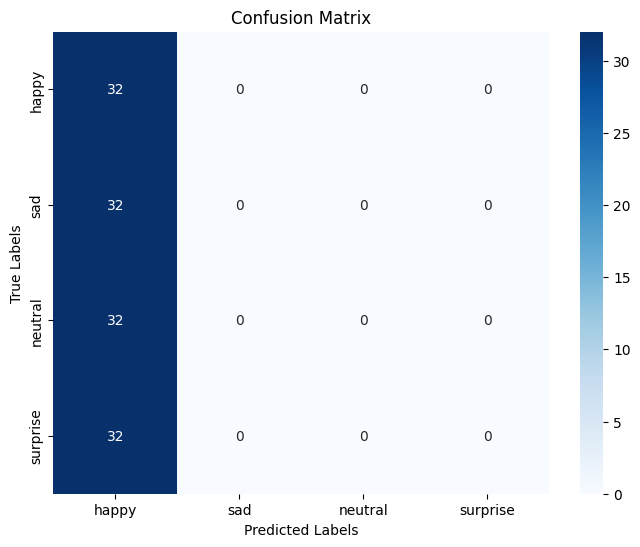

Classification Report:
              precision    recall  f1-score   support

       happy       0.25      1.00      0.40        32
         sad       0.00      0.00      0.00        32
     neutral       0.00      0.00      0.00        32
    surprise       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = resnetmodel.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_set.classes

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt='g', cmap='Blues', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate and print the classification report
class_labels = ['happy', 'sad', 'neutral', 'surprise']
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(classification_rep)


**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

*texto em itálico*## **EfficientNet Model**

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# EfficientNet Model
EfficientNet = tf.keras.applications.EfficientNetV2B2(include_top=False, weights="imagenet", input_shape=(48, 48, 3))
EfficientNet.summary()


35839040/35839040 [==============================] - 0s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_5[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2

### **Model Building**

**Build your own Architecture on top of the transfer layer. Be sure to have a Flatten layer after your transfer layer and also make sure you have 4 neurons and softmax activation function in your last dense layer**

In [52]:
# Model Building
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Add Flatten layer
x = Flatten()(transfer_layer_EfficientNet.output)

# Add Dense layers and/or BatchNormalization and Dropout layers
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

# Add the final Dense layer with 4 neurons and softmax activation function
pred = Dense(4, activation='softmax')(x)

Efficientnetmodel = Model(EfficientNet.input, pred)



##**Compiling**


In [53]:
# Write your code to compile your Efficientnetmodel. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.
# Compiling the Model
Efficientnetmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])


##**Training the Model**

In [54]:
# Define callbacks
checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.2,
                                       patience=3,
                                       verbose=1,
                                       min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Specify the number of epochs
epochs = 20


# Write your code to fit your model. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

In [55]:
# Model Training
history = Efficientnetmodel.fit(train_set,
                                 epochs=epochs,
                                 validation_data=validation_set,
                                 callbacks=callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.4890 - accuracy: 0.2494
Epoch 1: val_accuracy improved from -inf to 0.21519, saving model to ./Efficientnetmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/473 [==============================] - 42s 66ms/step - loss: 1.4890 - accuracy: 0.2494 - val_loss: 1.4699 - val_accuracy: 0.2152 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.4043 - accuracy: 0.2643
Epoch 2: val_accuracy improved from 0.21519 to 0.22704, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 29s 60ms/step - loss: 1.4043 - accuracy: 0.2643 - val_loss: 1.3883 - val_accuracy: 0.2270 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.3987 - accuracy: 0.2577
Epoch 3: val_accuracy improved from 0.22704 to 0.24432, saving model to ./Efficientnetmodel.h5
473/473 [==============================] - 28s 60ms/step - loss: 1.3986 - accuracy: 0.2579 - val_loss: 1.3963 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 1.3937 - accuracy: 0.2591
Epoch 4: val_accuracy did not improve from 0.24432
473/473 [========================

### **Evaluating the EfficientnetNet Model**

In [56]:
# Write your code to evaluate the model performance on the test set
# Evaluating the Model on Test Set
eval_result = Efficientnetmodel.evaluate(test_set)
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

4/4 [==============================] - 0s 19ms/step - loss: 1.4000 - accuracy: 0.2500
Test Loss: 1.3999905586242676
Test Accuracy: 0.25


4/4 [==============================] - 2s 28ms/step


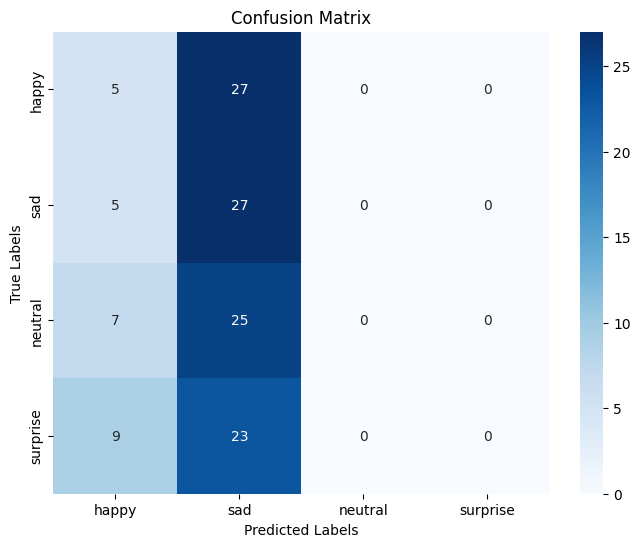

Classification Report:
              precision    recall  f1-score   support

       happy       0.19      0.16      0.17        32
         sad       0.26      0.84      0.40        32
     neutral       0.00      0.00      0.00        32
    surprise       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.11      0.25      0.14       128
weighted avg       0.11      0.25      0.14       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = Efficientnetmodel.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_set.classes

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt='g', cmap='Blues', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate and print the classification report
class_labels = ['happy', 'sad', 'neutral', 'surprise']
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(classification_rep)


**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

*   Item da lista
*   Item da lista



In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [58]:
import torch
from torchvision import transforms, datasets
#import zipfile


# Define the path to your dataset
data_path = '/content/Facial_emotion_images'

# Define the transformation for grayscale images
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor(),  # Convert to tensor
])

# Create testing dataset
test_dataset = datasets.ImageFolder(root=data_path + '/test', transform=transform)

# Create training dataset
train_dataset = datasets.ImageFolder(root=data_path + '/train', transform=transform)

# Create validation dataset
validation_dataset = datasets.ImageFolder(root=data_path + '/validation', transform=transform)

# Define batch size for the data loader
batch_size = 64

# Create data loaders for training, testing, and validation
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=batch_size, shuffle=False)


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Constants
batch_size = 32
img_size = 48
no_of_classes = 4
folder_path = "/content/Facial_emotion_images"  # Replace with your actual folder path

datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

train_set = datagen_train.flow_from_directory(
    folder_path + "/train",  # Correct the path here
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=True
)

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "/validation",  # Correct the path here
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=False
)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(
    folder_path + "/test",  # Correct the path here
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=False
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [61]:
print("Number of images on train_test:", len(train_set.filenames))
print("Number of images on validation_test:",len(validation_set.filenames))
print("Number of images on test_test:", len(test_set.filenames))


Number of images on train_test: 15109
Number of images on validation_test: 4977
Number of images on test_test: 128


### **Model Building**

* In this network, we plan to have 5 Convolutional Blocks
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input shape = (48, 48, 1)**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a Dropout Ratio of **0.2**. This completes the first Convolutional block.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **512 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **512 filters**.
* Add the fifth block, having **128 filters**.
* Then add your Flatten layer, followed by your Dense layers.
* Add your first Dense layer with **256 neurons** followed by a BatchNormalization layer, a **'relu'** Activation, and a Dropout layer. This forms your first Fully Connected block
* Add your second Dense layer with **512 neurons**, again followed by a BatchNormalization layer, **relu** activation, and a Dropout layer.
* Add your final Dense layer with 4 neurons.
* Compile your model with the optimizer of your choice.

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_model():
    model3 = Sequential()

    # First convolution layer
    model3.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same", input_shape=(48, 48, 1)))
    model3.add(LeakyReLU(0.1))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Dropout(0.2))

    # Second convolution layer
    model3.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same"))
    model3.add(LeakyReLU(0.1))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Dropout(0.2))

    # Third convolution layer
    model3.add(Conv2D(filters=512, kernel_size=(2, 2), padding="same"))
    model3.add(LeakyReLU(0.1))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Dropout(0.2))

    # Fourth convolution layer
    model3.add(Conv2D(filters=512, kernel_size=(2, 2), padding="same"))
    model3.add(LeakyReLU(0.1))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Dropout(0.2))

    # Fifth convolution layer
    model3.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same"))
    model3.add(LeakyReLU(0.1))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(Dropout(0.2))

    # Flatten before transitioning to fully connected layers
    model3.add(Flatten())

    # Fully connected layers
    model3.add(BatchNormalization())
    model3.add(Dense(256, activation='relu'))
    model3.add(Dropout(0.4))
    model3.add(Dense(512, activation='relu'))
    model3.add(Dropout(0.4))
    model3.add(Dense(4, activation='softmax'))

    # Use Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate
    model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model3

# Build the model
model3 = build_model()



### **Compiling**

In [63]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

# Compile the model
model3.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary

model3.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        320       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 128)       32896     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 24, 24, 128)       0         
                                                      

##**Training the Model**

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping

# Defina seus outros imports necessários

# Defina seus callbacks
checkpoint = ModelCheckpoint('modelo.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)
csv_logger = CSVLogger('treinamento.log')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Combine os callbacks em uma lista
callbacks = [checkpoint, reduce_lr, csv_logger, early_stopping]

# Use os callbacks durante o treinamento
history = model3.fit(
    train_set,
    epochs=35,  # Aqui você deve definir o número de épocas diretamente
    validation_data=validation_set,
    callbacks=callbacks
)


Epoch 1/35
473/473 [==============================] - 23s 38ms/step - loss: 1.4227 - accuracy: 0.2653 - val_loss: 1.3765 - val_accuracy: 0.3669 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/35
473/473 [==============================] - 17s 36ms/step - loss: 1.3878 - accuracy: 0.2626 - val_loss: 1.4314 - val_accuracy: 0.1623 - lr: 0.0010
Epoch 3/35
473/473 [==============================] - 18s 38ms/step - loss: 1.3863 - accuracy: 0.2663 - val_loss: 1.3651 - val_accuracy: 0.3179 - lr: 0.0010
Epoch 4/35
473/473 [==============================] - 18s 39ms/step - loss: 1.3717 - accuracy: 0.2905 - val_loss: 1.2903 - val_accuracy: 0.3275 - lr: 0.0010
Epoch 5/35
473/473 [==============================] - 19s 39ms/step - loss: 1.2911 - accuracy: 0.3597 - val_loss: 1.2844 - val_accuracy: 0.3568 - lr: 0.0010
Epoch 6/35
473/473 [==============================] - 18s 37ms/step - loss: 1.2098 - accuracy: 0.4260 - val_loss: 1.1973 - val_accuracy: 0.4726 - lr: 0.0010
Epoch 7/35
473/473 [==============================] - 18s 39ms/step - loss: 1.1129 - accuracy: 0.5078 - val_loss: 0.9313 - val_accuracy: 0.5980 - lr: 0.0010
Epoch 8/35
473/473 [==============================] - 22s 

### **Evaluating the Model on Test Set**

In [65]:
# Write your code to evaluate the model performance on the test set

# Evaluate the model on the test set
test_loss, test_accuracy = model3.evaluate(test_set)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

1/1 [==============================] - 1s 716ms/step - loss: 0.5448 - accuracy: 0.7578
Test Loss: 0.5447614192962646, Test Accuracy: 0.7578125


**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**



1/1 [==============================] - 0s 242ms/step


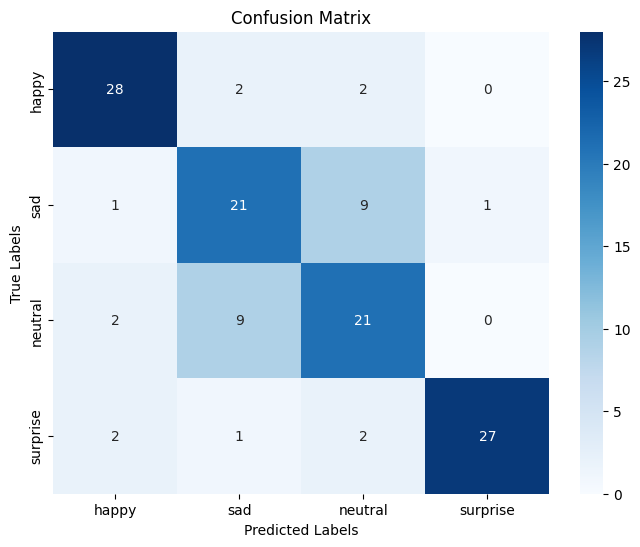

Classification Report:
              precision    recall  f1-score   support

       happy       0.85      0.88      0.86        32
         sad       0.64      0.66      0.65        32
     neutral       0.62      0.66      0.64        32
    surprise       0.96      0.84      0.90        32

    accuracy                           0.76       128
   macro avg       0.77      0.76      0.76       128
weighted avg       0.77      0.76      0.76       128



In [66]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model3.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_set.classes

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt='g', cmap='Blues', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate and print the classification report
class_labels = ['happy', 'sad', 'neutral', 'surprise']
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(classification_rep)


**Observations and Insights:__**

## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?